# EX.1

![ex1.png](./ex1.PNG)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
def abline(ax, b, m, *args , **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim , ylim , *args , **kwargs)

In [5]:
Auto = load_data('Auto')
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [6]:
Auto.shape

(392, 8)

In [21]:
X = Auto[['horsepower']]
y = Auto['mpg']

In [8]:
model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X, y)
# Access the linear model
linreg = model.named_steps['linearregression']

# Get coefficients and intercept
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Intercept: 39.93586102117048
Coefficients: [ 0.         -0.15784473]


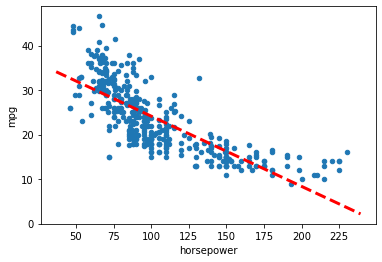

In [9]:
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax, linreg.intercept_, linreg.coef_[1], 'r--', linewidth = 3)

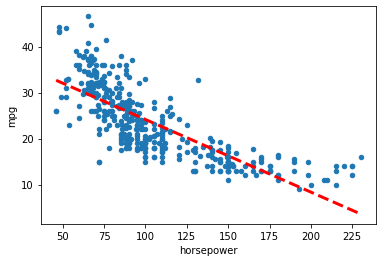

In [10]:
x_vals_lin = np.linspace(X.min(), X.max(), 392).reshape(-1, 1)
x_vals_lin = pd.DataFrame({'horsepower': x_vals_lin.ravel()})
# Predict using the same transformation
y_pred_lin = model.predict(x_vals_lin)

# Plot
Auto.plot.scatter('horsepower', 'mpg')
plt.plot(x_vals_lin, y_pred_lin, 'r--', linewidth = 3)
plt.show()

In [11]:
model.score(X, y)

0.6059482578894348

With a relatively high value of $R^2 = 0.606$, we can find an inverse proportionality between horsepower and mpg (miles per gallon). This result intuitively makes sense: a more powerful engine tends to consume an higher amount of fuel and so it makes a lower number of miles with a gallon of fuel.

In [12]:
fitted_values = model.predict(X)
residuals = y - fitted_values

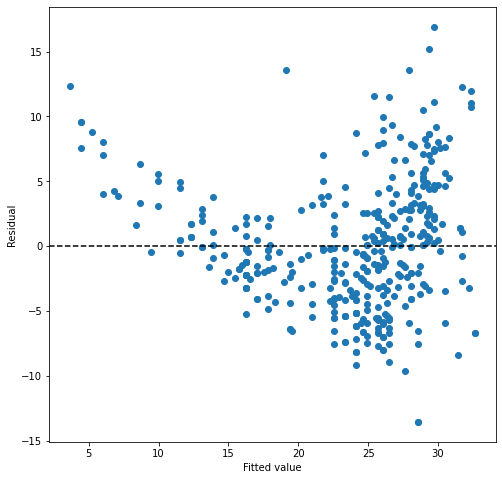

In [13]:
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(fitted_values , residuals)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [14]:
model_sq = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_sq.fit(X, y)
# Access the linear model
linreg = model_sq.named_steps['linearregression']

# Get coefficients and intercept
print("Intercept:", linreg.intercept_)
print("Coefficients:", linreg.coef_)

Intercept: 56.900099702113096
Coefficients: [ 0.         -0.46618963  0.00123054]


     horsepower
0     46.000000
1     46.470588
2     46.941176
3     47.411765
4     47.882353
..          ...
387  228.117647
388  228.588235
389  229.058824
390  229.529412
391  230.000000

[392 rows x 1 columns]


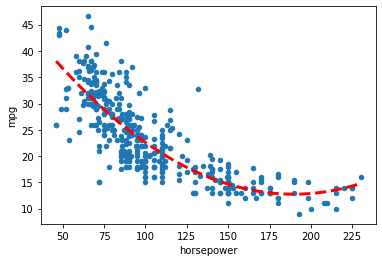

In [22]:
x_vals_sq = np.linspace(X.min(), X.max(), 392).reshape(-1, 1)
x_vals_sq = pd.DataFrame({'horsepower': x_vals_sq.ravel()})
print(x_vals_sq)
# Predict using the same transformation
y_pred_sq = model_sq.predict(x_vals_sq)

# Plot
Auto.plot.scatter('horsepower', 'mpg')
plt.plot(x_vals_sq, y_pred_sq, 'r--', linewidth = 3)
plt.show()

In [16]:
model.score(X, y)

0.6059482578894348